In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

Прочитаем данные Airbnb по жилью, которое можно арендовать. 

In [2]:
df = pd.read_csv("data/airbnb.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Диаграмма рассеяния

Самый простой способ визуализировать получившиеся кластеры — выделить разными цветами данные, принадлежащие к разным кластерам. В этом поможет **диаграмма рассеяния**, на которой по двум осям откладываются значения признаков объекта. С помощью такой простой визуализации легко понять, правильно ли прошла кластеризация, действительно ли разные объекты оказались в разных классах, а похожие — в одном.

Мы с вами уже умеем визуализировать диаграммы рассеяния и выделять разными цветами данные, принадлежащие к разным кластерам. Сейчас мы повторим пройденное, а также дополнительно выделим на графике центроиды кластеров. Для этого построим модель k-means-кластеризации, выделив в данных шесть кластеров, а далее найдём центроиды и визуализируем результаты.

Нас интересует ширина и долгота арендного жилья, и стоимость аренды. 
Рассмотрим, кластеризацию по 2 признакам, а именно, выделим группы жилья по локации.
А для 3D признака еще добавим к текущим признакам цену и рассмотрим, как локация влияет на цену, визуализируем результаты.

<Axes: xlabel='latitude', ylabel='longitude'>

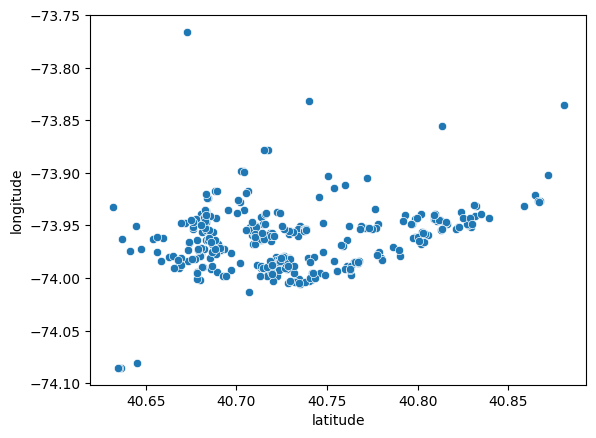

In [4]:
sns.scatterplot(x=df.latitude, y=df.longitude)

In [8]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means модель кластеризации на данных о широте и долготе, сохраним данные о кластерах для этих данных в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions

In [9]:
# с помощью метода cluster_centers_ найдем координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для 6 кластеров сохраним в отдельные списоки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, для того, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся 6 раз, так как у нас 6 кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от того, какое значение в ячейке clusters в ячейке cen_x, cen_y и color будут разные значения. Если кластер 0, то в cen_x и cen_y будут координаты центроида нулевого кластера и цвет нулевого кластера. 

In [11]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4,40.677091,-73.970540,#20DFC5
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,3,40.768055,-73.973091,#DF20C8
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,40.818934,-73.941395,#DF2020
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4,40.677091,-73.970540,#20DFC5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,40.818934,-73.941395,#DF2020


## Визуализация кластеров

<Axes: xlabel='latitude', ylabel='longitude'>

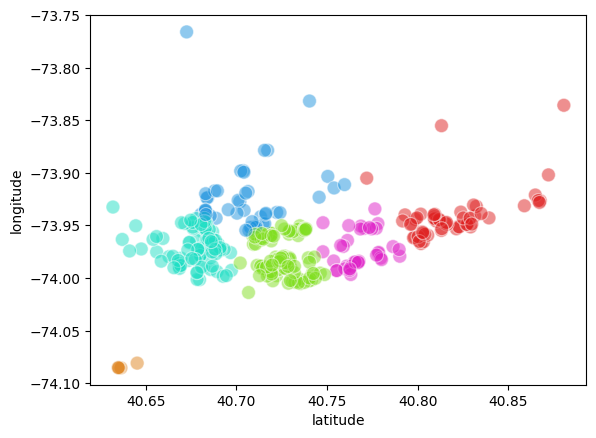

In [18]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.5, s=100) #alpa - прозрачность, s - размер

## Визуализация центроидов 

<Axes: xlabel='latitude', ylabel='longitude'>

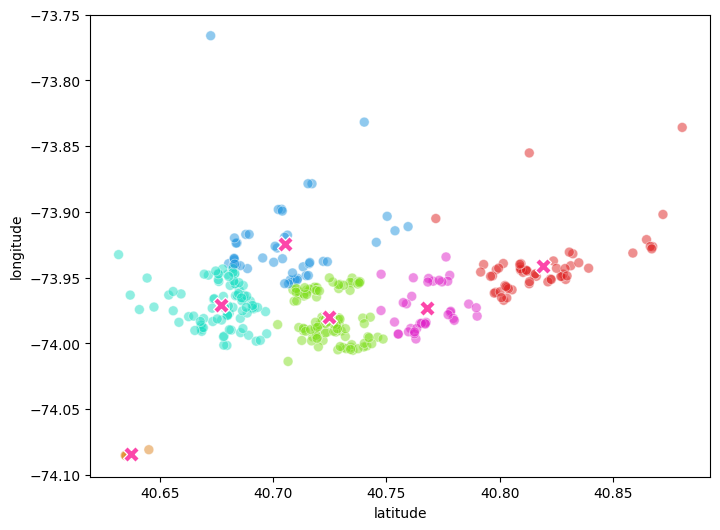

In [19]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

## Convex Hull

В предыдущем примере оценивать размеры кластеров мы могли лишь на глаз. При рассмотрении диаграммы рассеяния вам, возможно, хотелось провести «границы» кластеров, чтобы оценить их размеры. Провести границы кластеров мы можем с помощью визуализации **выпуклых оболочек** кластеров

> Выпуклая оболочка (Convex Hull) множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры.

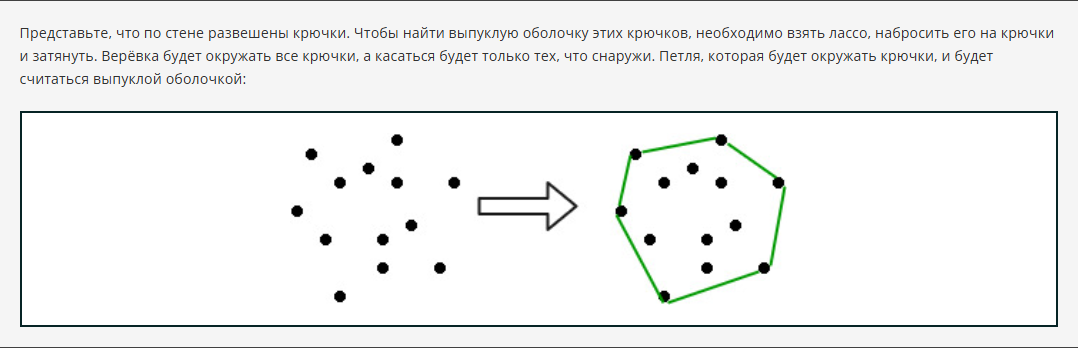

> Визуализация Convex Hull помогает понять, насколько получившиеся кластеры крупные и разнообразные. Если все элементы кластера похожи друг на друга, площадь выпуклой оболочки будет маленькой, в противном случае — наоборот. Также на данной диаграмме хорошо заметны выбросы в данных. Выбросы находятся далеко от основных элементов кластера, а значит площадь выпуклой оболочки получается большой.

Для построения выпуклой оболочки для каждого кластера воспользуемся библиотекой scipy и модулем ConvexHull.
ConvexHull на вход принимает значения признаков объектов, для которых нужно построит выпуклую оболочку. 
Индексы точек из points, которые образуют вершины выпуклой оболочки можно получить с помощью метода vertices:


points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

И мы получим списк из значений координат [0, 4, 3, 2]
После этого мы можем найти координаты этих точек из списка points.

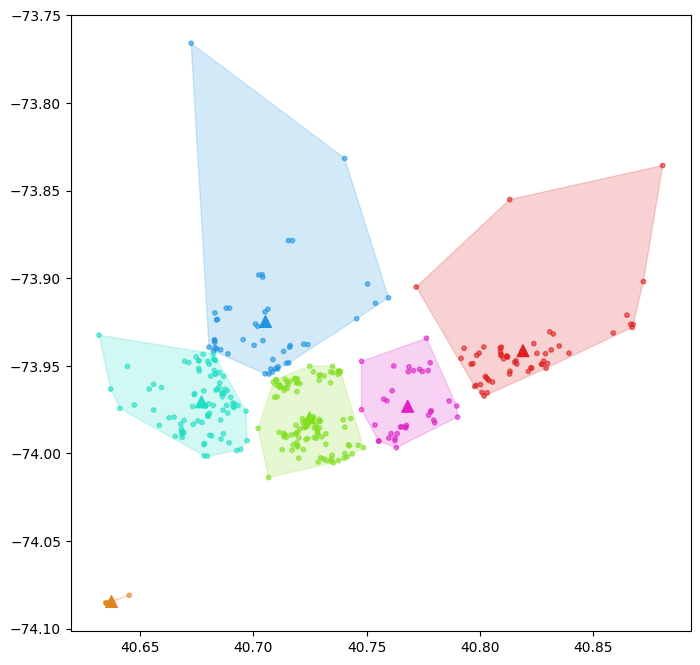

In [24]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])



В данном случае можно сказать, что среди элементов розового и зелёного кластеров содержатся выбросы, за счёт которых выпуклая оболочка стала большой. Элементы синего кластера наиболее похожи между собой, элементы красного довольно разнообразны относительно других кластеров.

> Таким образом, если мы хотим лучше понять, какие данные находятся в кластерах, насколько сильно они схожи между собой или различны, на помощь придёт график Convex Hull

Диаграмма рассеяния и *Convex Hull* помогают визуализировать только результаты, т. е. то, как данные разделились на кластеры. Для иерархической же кластеризации мы можем визуализировать не только полученные результаты, но и то, как данные делились на кластеры в ходе работы алгоритма. Для такой визуализации нужно использовать **дендрограммы.**

## Дендрограммы 

> Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

- наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
- понять, насколько похожи соседние кластеры между собой;
- предположить, какое количество кластеров можно было бы выбрать для кластеризации.

Для визуализации дендрограммы нам понадобится библиотека Scipy и модули dendrogram и linkage.

*linkage* — это способ расчёта расстояния между двумя кластерами.

В переменной method можно задать разные способы расчёта расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информации о расстоянии объектов, полученной из функции linkage. Данная информация позволяет строить на дендрограмме ветви разной высоты.

Наиболее важные переменные, которые принимает функция dendrogram:

- *Z* — расстояния до объектов кластеров, полученные из функции *linkage.*
- *orientation* — ориентация дендрограммы. Данный параметр может принимать значения *top, bottom, left, right.*
- *labels* — список с предсказаниями, к какому кластеру какой объект относится.
- *distance_sort* — определяет, в каком порядке будут визуализированы кластеры: ascending или True означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; *descending* или *False* — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.

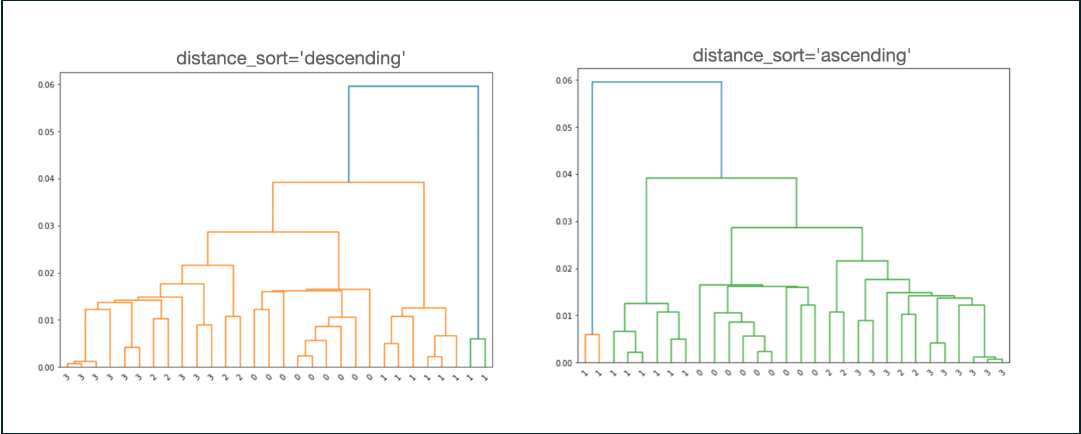

In [5]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

Как мы уже знаем, результаты иерархической кластеризации можно представить в виде дендрограммы. Теперь научимся рисовать дендрограммы с предсказаниями. Для этого нам понадобится библиотека scipy и модули dendrogram и linkage.
linkage - это способ подсчета расстояния между двумя кластерами.
В переменной method можно задать разные способы подсчета рассчета расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информацию о расстоянии объектов, полученную из функции linkage, данная информация позволит строить ветви дендрограммы разной высоты.
Рассмотрим одни из наиболее важных переменных, которые принимает функция dendrogram:
- параметр Z - расстояния до объектов кластеров, полученные из функции linkage;
- orientation - ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right;
- labels - список с предсказаниями, к какому кластеру какой объект относится
- distance_sort - определяет в каком порядке будут визуализированы кластеры. ascending или True означает, что сначала отрисовывается пара кластеров с наибольшим расстоянием между ними. descending или False означает, что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.


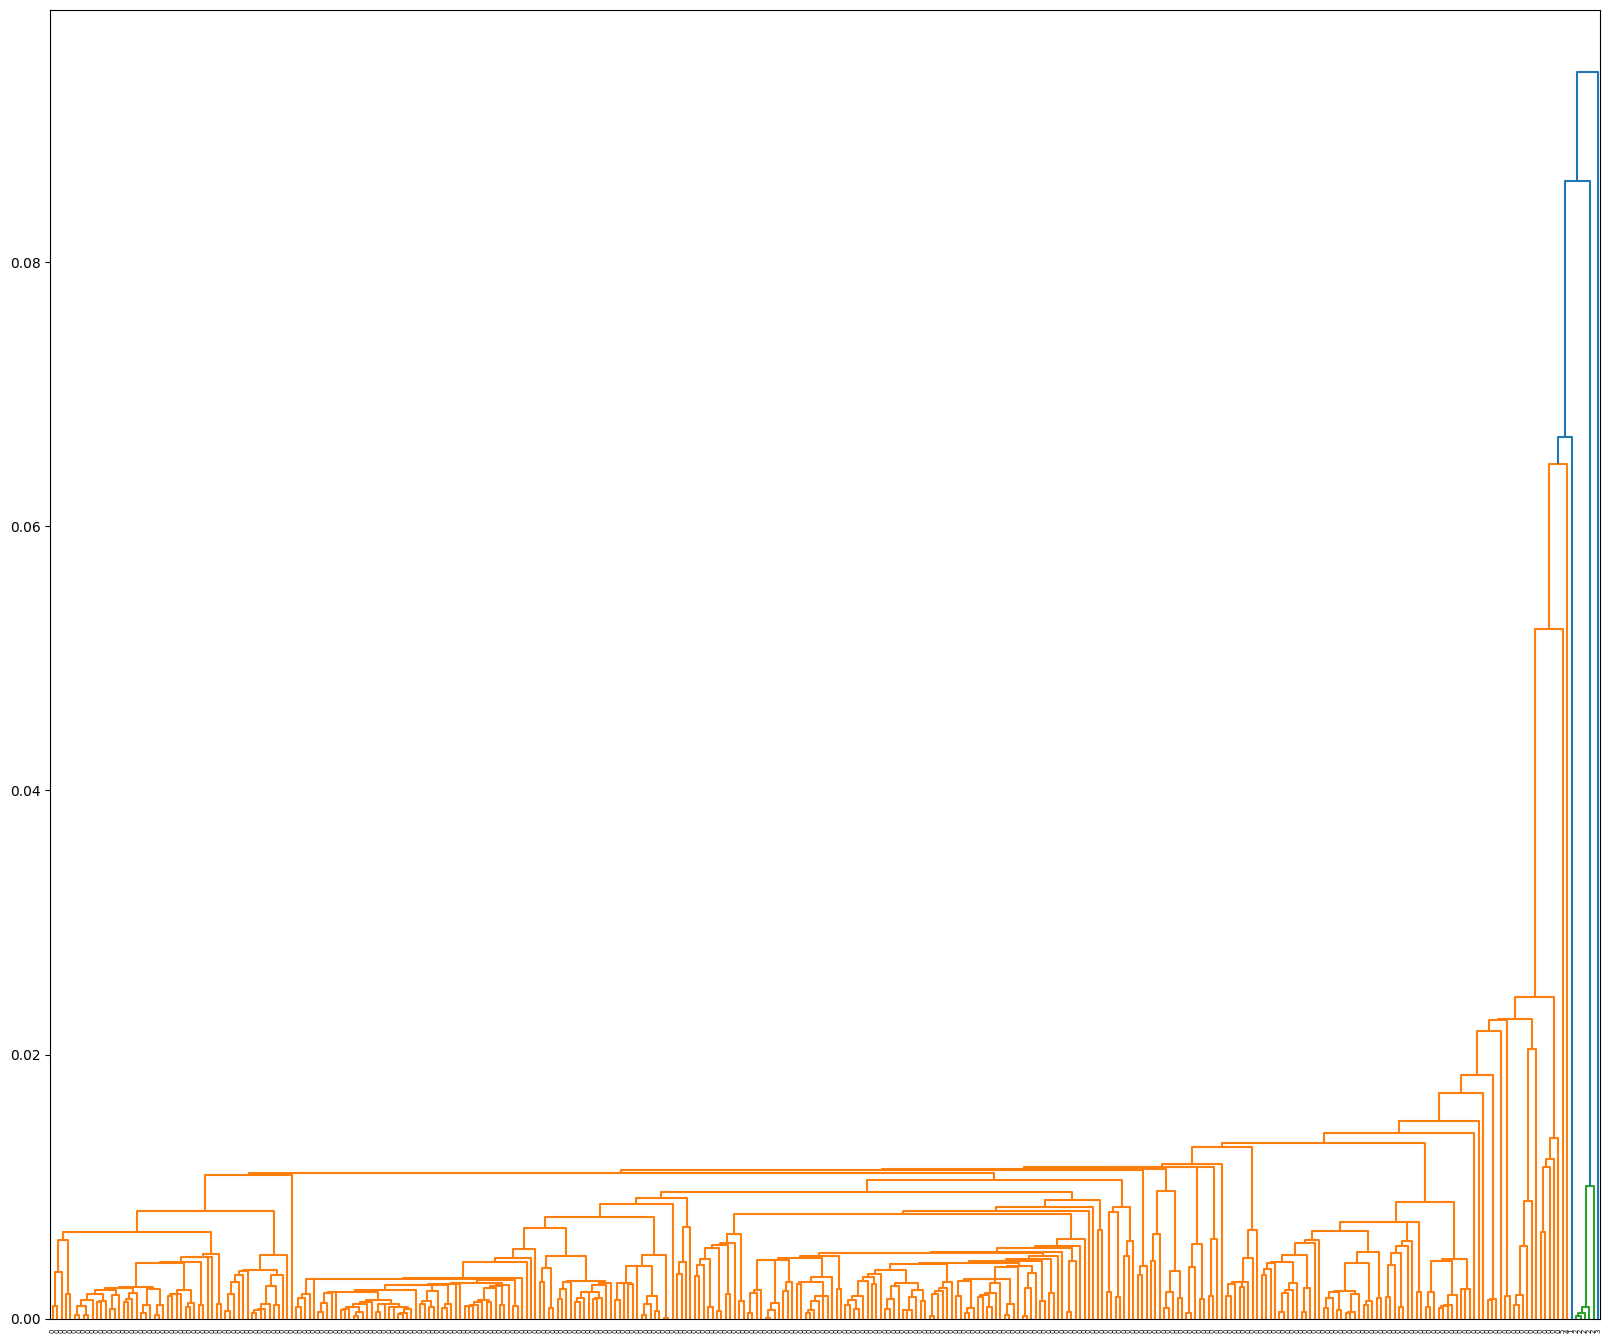

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# расссчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

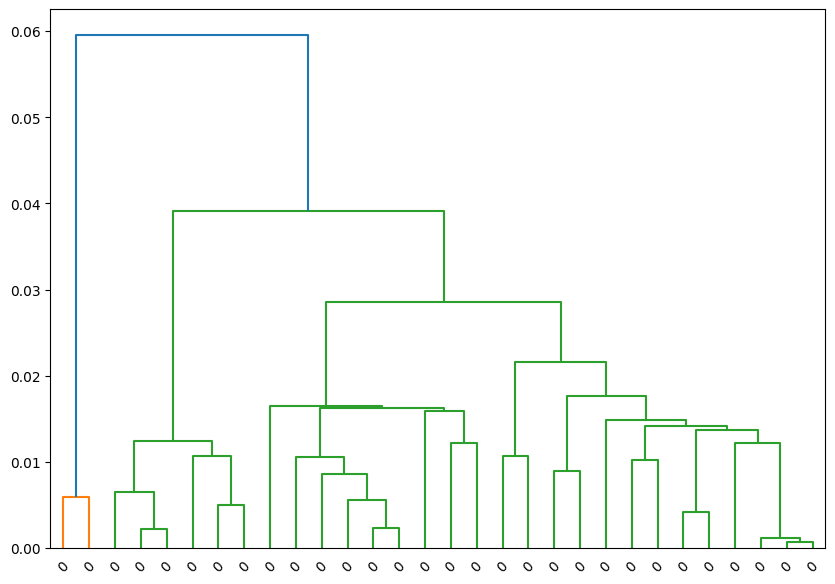

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


linked = linkage(df[:30][["latitude", "longitude"]], 'single')

plt.figure(figsize=(10, 7))

dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model[:30],
            distance_sort='ascending')

plt.show()

Так как данных немало, график получается несколько перегруженным. На дендрограмме можно наблюдать, как проходил процесс кластеризации: исходные элементы, находящиеся снизу, объединялись сначала в много мелких кластеров, затем эти кластеры объединялись между собой, пока в самом конце все кластеры не объединились в один большой.

Из данного графика понятно, на сколько кластеров можно разделить данные. В данном случае, основываясь на значениях расстояний между кластерами, мы можем провести мысленную горизонтальную линию и посмотреть, сколько ветвей дендрограммы она пересечёт (это количество и будет равно количеству кластеров). Например, если мы считаем, что расстояния 0.04 между кластерами достаточно для того, чтобы считать кластеризацию завершённой, данные нужно делить на шесть кластеров. На рисунке ниже мы провели мысленную горизонтальную линию на значении 0.04. Данная линия пересекла шесть ветвей дендрограммы:

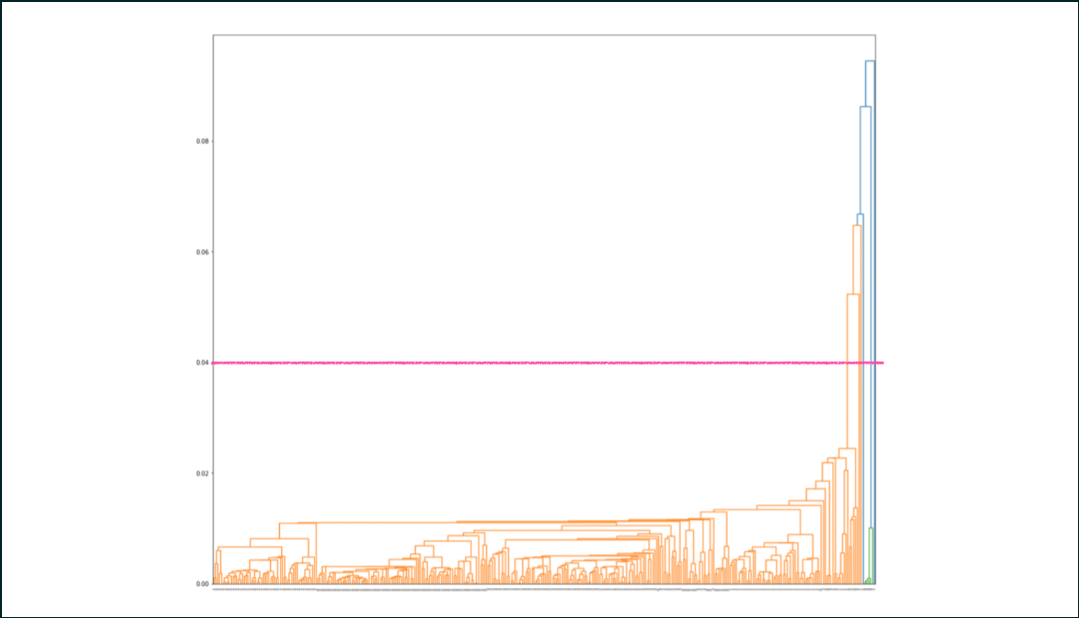

Также по дендрограмме мы можем понять, насколько кластеры похожи между собой: чем меньше высота внутренних веток, тем более похожими считаются кластеры. В нашем случае можно наблюдать, что в самом начале объекты были схожи, так как высота внутренних веток была маленькой, а далее, когда внутренних веток осталось шесть, высота стала больше, то есть кластеры стали отличаться друг от друга:

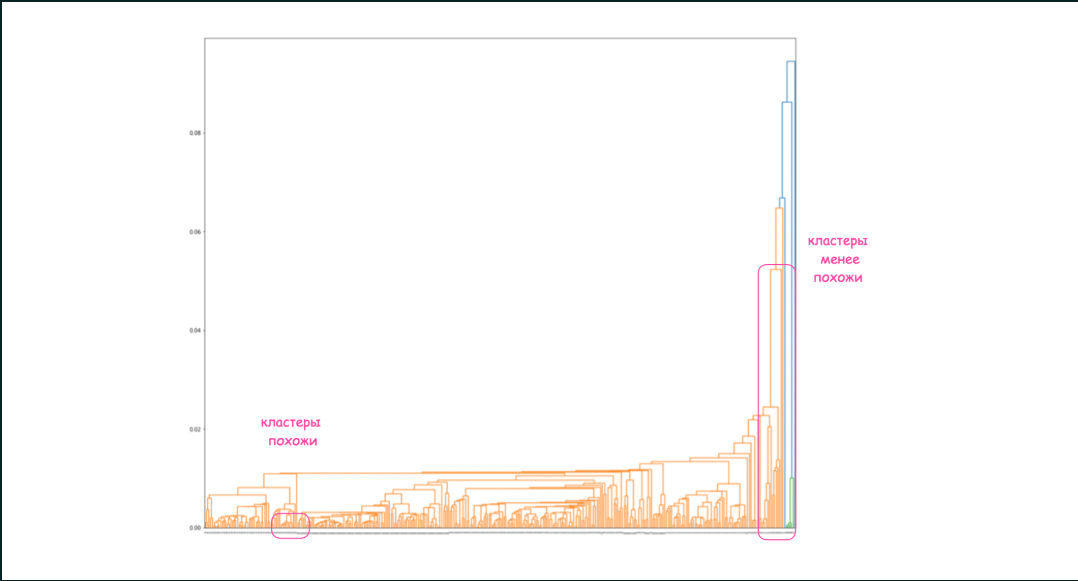

График дендрограммы получается довольно информативным, но его можно использовать только для иерархической кластеризации. Что делать, если для других видов кластеризации также хочется наблюдать, как данные делятся на два, три и более кластеров? Для этого можно использовать **Clustergram-визуализацию.**

## Clustergram визуализация

Построение кластеров можно отследить только для иерархической кластеризации. Для k-means-кластеризации мы можем только визуализировать полученные кластеры. Однако иногда бывает интересно представить, как выглядели бы данные, если бы кластеров было, например, два, а не три.

Относительно недавно был разработан ещё один способ визуализации — **Clustergram.**

> Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

> Далее мы рассмотрим только базовые принципы Clustergram-кластеризации. Более подробную информацию можно найти [тут.](https://github.com/martinfleis/clustergram)

> Графики *Clustergram* позволяют отследить, как делятся данные при разном количестве кластеров. Более того, можно оценить, в каком кластере объектов больше, а в каком — меньше.

Графики *Clustergram* выглядят следующим образом:

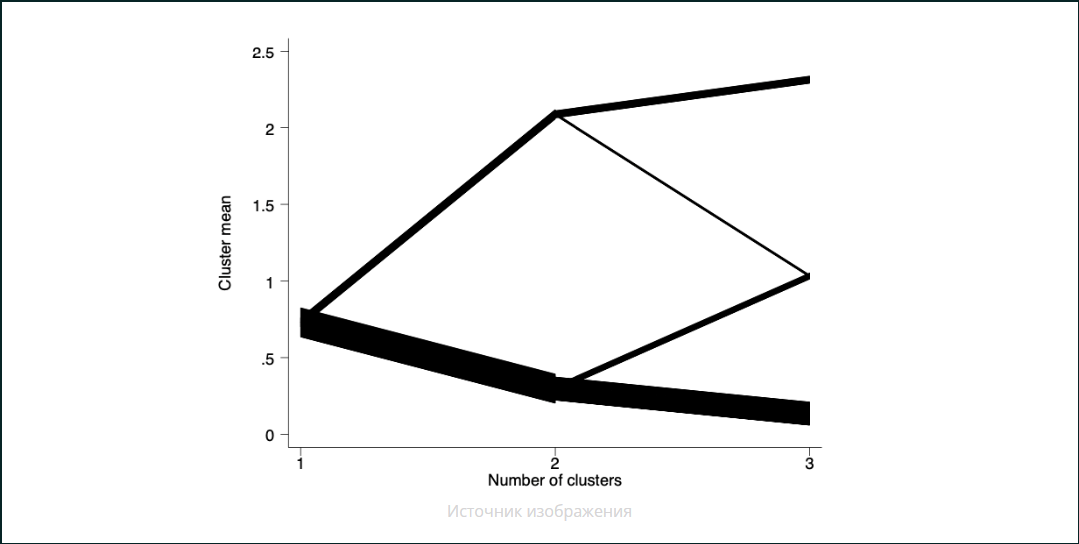

**Как их интерпретировать?**

Изначально все наблюдения образуют единый кластер (исходные данные). После данные делятся на два кластера. При этом можно заметить, что нижняя линия толще — это означает, что во второй кластер попало больше объектов. Далее данные делятся на три кластера, при этом второй снизу кластер образуется путём слияния некоторых элементов из двух предыдущих кластеров.

> Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

Установить данную библиотеку можно через pip:

> pip install clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.082 seconds.
K=3 fitted in 0.004 seconds.
K=4 fitted in 0.005 seconds.
K=5 fitted in 0.003 seconds.
K=6 fitted in 0.003 seconds.
K=7 fitted in 0.003 seconds.
K=8 fitted in 0.003 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

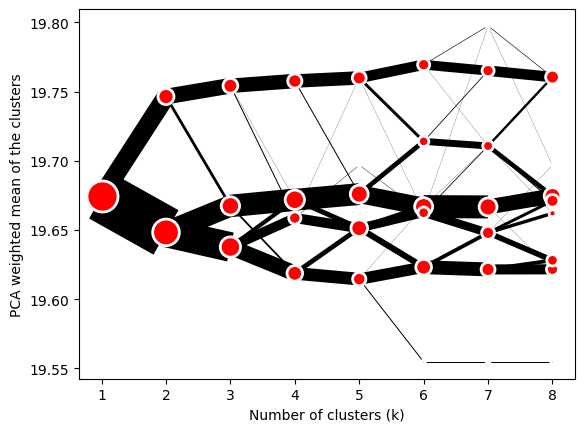

In [5]:
from clustergram import Clustergram

# задаем количество кластеров, для которого хотим получить визуализиацию
cgram = Clustergram(range(1, 9), method='kmeans')
# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

На данном графике мы можем наблюдать, как изменяются данные в ходе кластеризации. Сначала один кластер разделился на два. При этом эти кластеры неравномерные: в нижнем кластере данных существенно больше (так как нижняя линия значительно толще), чем в верхнем. Далее данные делятся на три кластера, при этом количество объектов в двух кластерах примерно одинаковое, а в третьем, верхнем, кластере объектов всё ещё меньше. Таким образом мы можем оценивать равномерность получившихся кластеров.

## 3D визуализация

Если кластеризация проводится не в двухмерном пространстве (по двум признакам), а в трёхмерном, для того, чтобы визуально оценить её результаты, необходимо проводить визуализацию в 3D-пространстве. В этом нам поможет библиотека *Matplotlib* или *Plotly*. 

Выше мы рассматривали кластеризацию в двухмерном пространстве и кластеризовали жильё в Нью-Йорке, представленное для аренды на *Airbnb*, основываясь на широте и долготе. Теперь давайте добавим третий признак — суточную стоимость аренды (поле price в датафрейме).

Чтобы визуализировать результаты 3D-кластеризации, её необходимо сначала провести:

In [30]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means модель кластеризации на данных широты, долготы и цене, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

Text(0.5, 0, 'price')

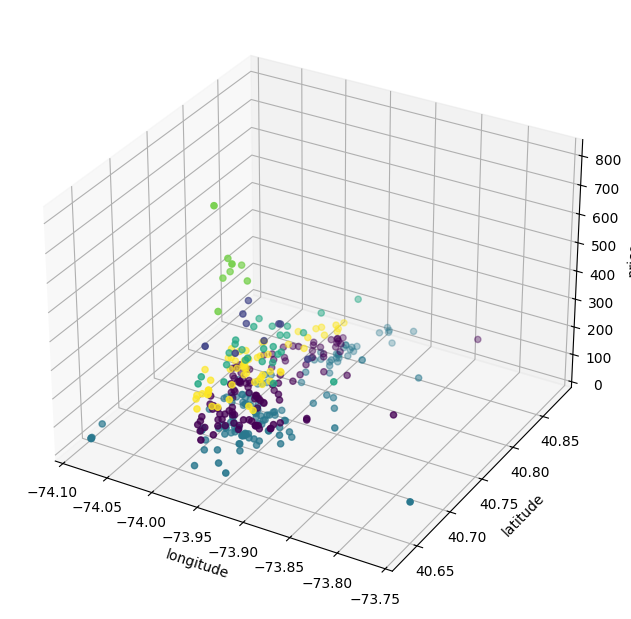

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавитм дольнительную ось в объект картинки
fig.add_axes(ax)


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Однако при визуализации с этого ракурса не очень понятно, где находится зелёная точка, — кажется, что она потерялась среди синих:

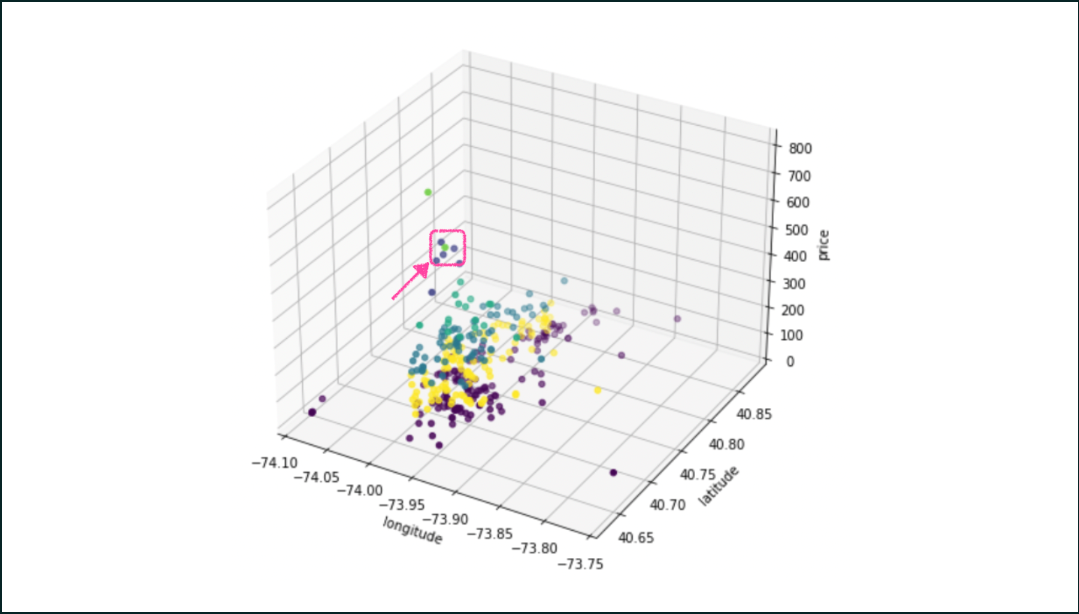

Чтобы изменить угол обзора, существует два параметра:

- *ax.azim* — куб будет вращаться слева направо в зависимости от изменения этой величины;
- *ax.elev* — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

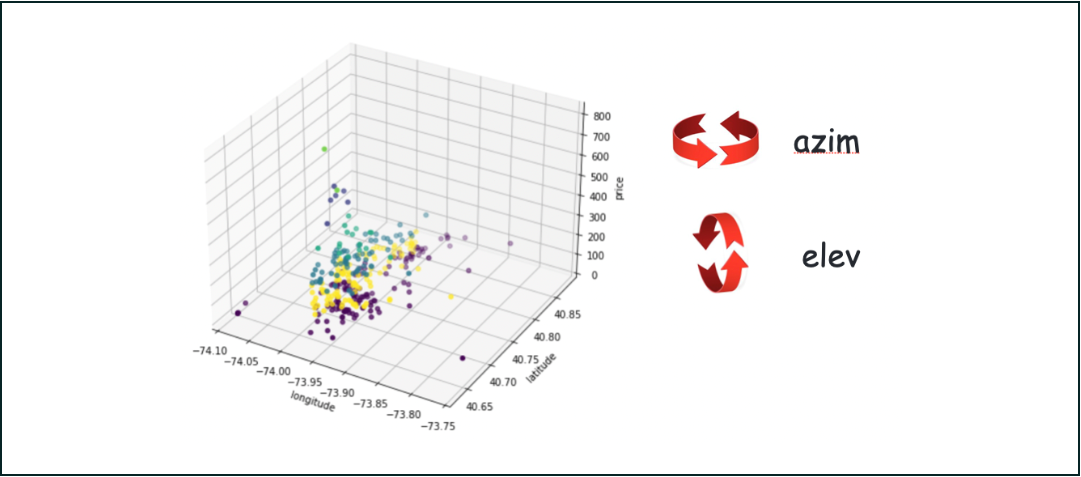

Изменим угол визуализации: 

Text(0.5, 0, 'price')

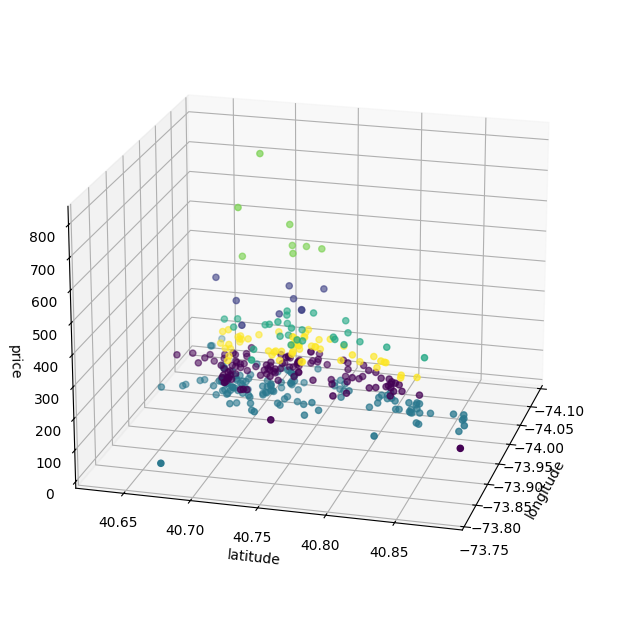

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавитм дольнительную ось в объект картинки
fig.add_axes(ax)


ax.azim = 15
ax.elev = 20


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Теперь, если рассматривать график под другим углом, мы видим, что на самом деле зелёная точка не потерялась среди элементов другого кластера. Данные в трёхмерном пространстве образовали чёткие кластеры, и в основном они основываются на цене арендных квартир. Внизу мы видим фиолетовый кластер с самыми дешёвыми квартирами, а наверху — сиреневый и зелёный кластеры с самыми дорогими. При этом они, по всей видимости, располагаются в одном районе, так как значения широты и долготы довольно близкие.

> Таким образом, при статической визуализации 3D-пространства бывает полезно рассмотреть график с нескольких сторон, чтобы однозначно оценить результаты кластеризации.

Хоть мы и получили нужную информацию из предыдущей визуализации, но было не совсем удобно каждый раз задавать для 3D-графика параметры обзора. Было бы идеально сделать график интерактивным, чтобы один раз провести визуализацию, а затем самим поворачивать график, как нам удобно. В этом поможет *Plotly:*

In [35]:
import plotly
import plotly.express as px

fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters_3d', 

    width=1000,
    height=700
)

fig.show()

Анализируя результаты кластеризации, полученные с помощью Plotly, можно прийти к тем же выводам, которые мы сделали до этого. Но в данном случае мы можем интерактивно рассматривать график, а это намного удобнее.

> В данном юните мы рассмотрели разные способы визуализации кластеров. На практике вы, скорее всего, будете чаще пользоваться диаграммой рассеяния для быстрой визуальной проверки результатов кластеризации для двухмерного и трёхмерного случаев.

Подведём общий итог и соберём все способы визуализации кластеров в сводную таблицу, чтобы понять, какую визуализацию следует использовать в зависимости от целей и используемых алгоритмов кластеризации.

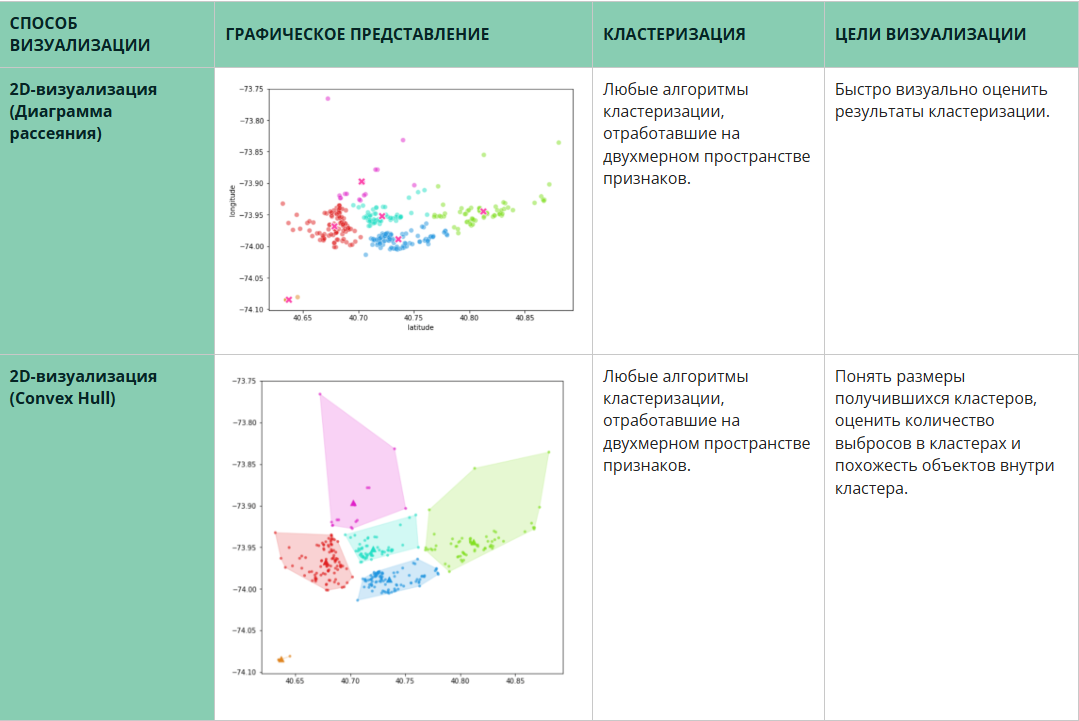
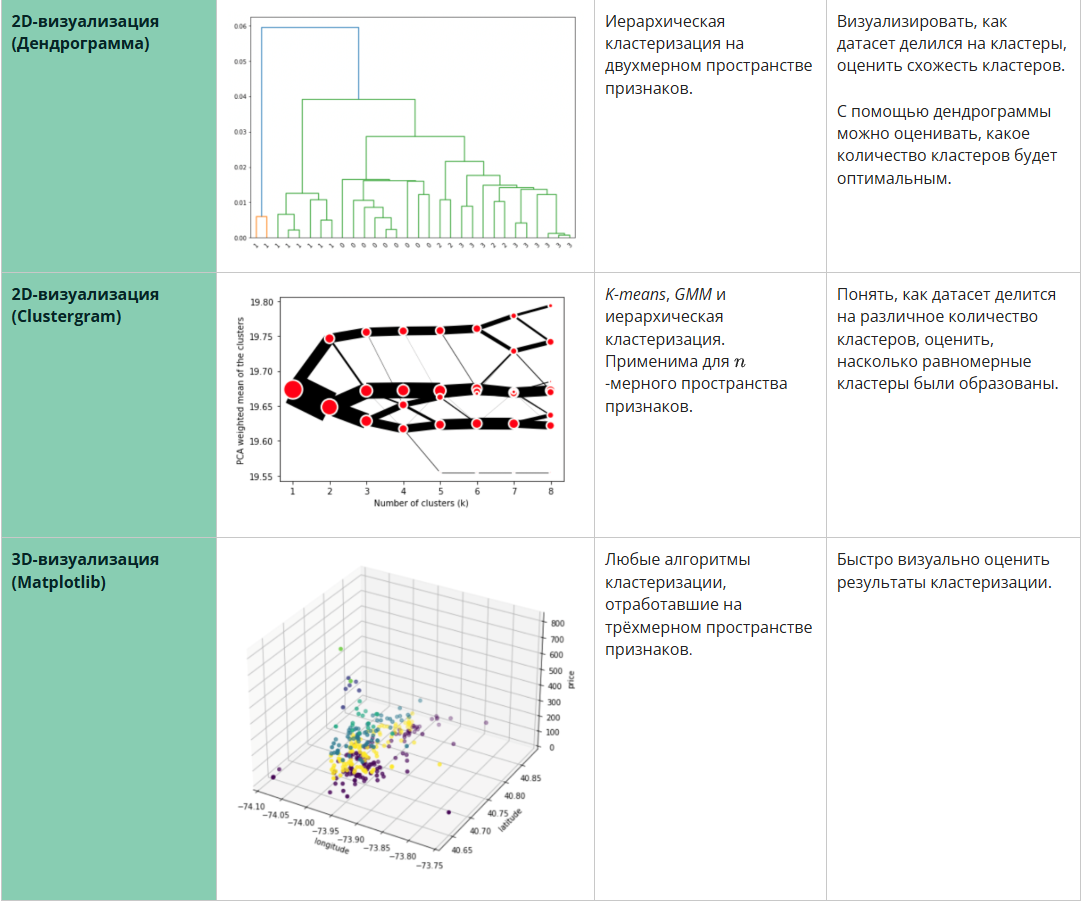
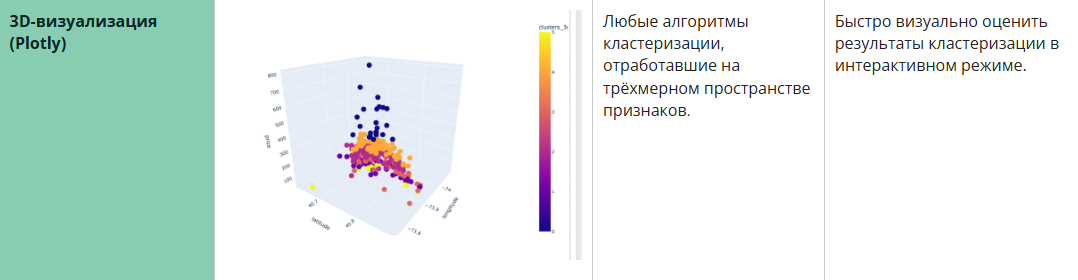

### Задание 8.1

Выберите график, на котором изображён *Convex Hull:*

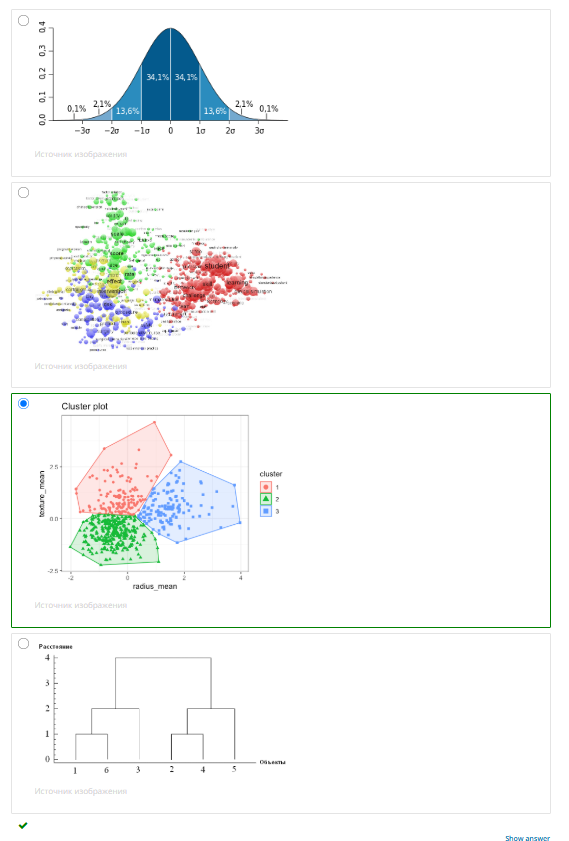

### Задание 8.2

Результаты какой кластеризации можно визуализировать в виде дендрограммы?

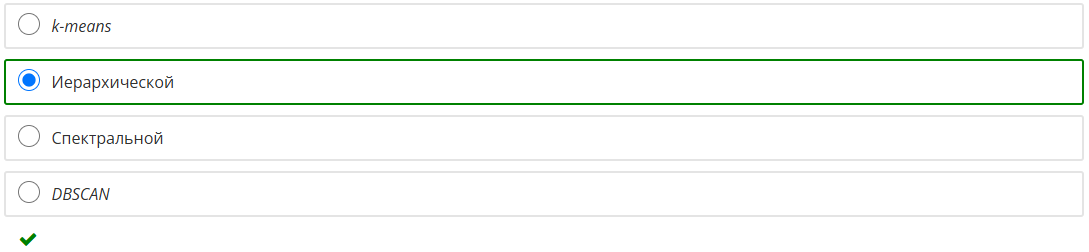

### Задание 8.3
Если кластеризация была проведена по трём признакам объектов, для визуализации результатов нужно использовать...

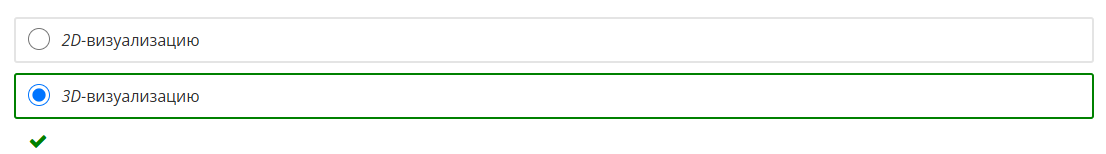

### Задание 8.4

Для датасета *Airbnb* проведите иерархическую агломеративную кластеризацию с использованием *sklearn*. В качестве признаков для кластеризации используйте *latitud*e и *longitude* из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

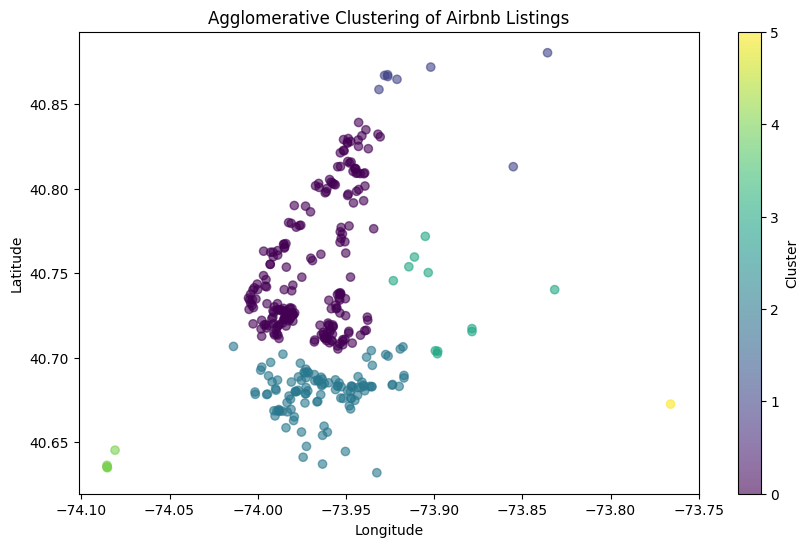

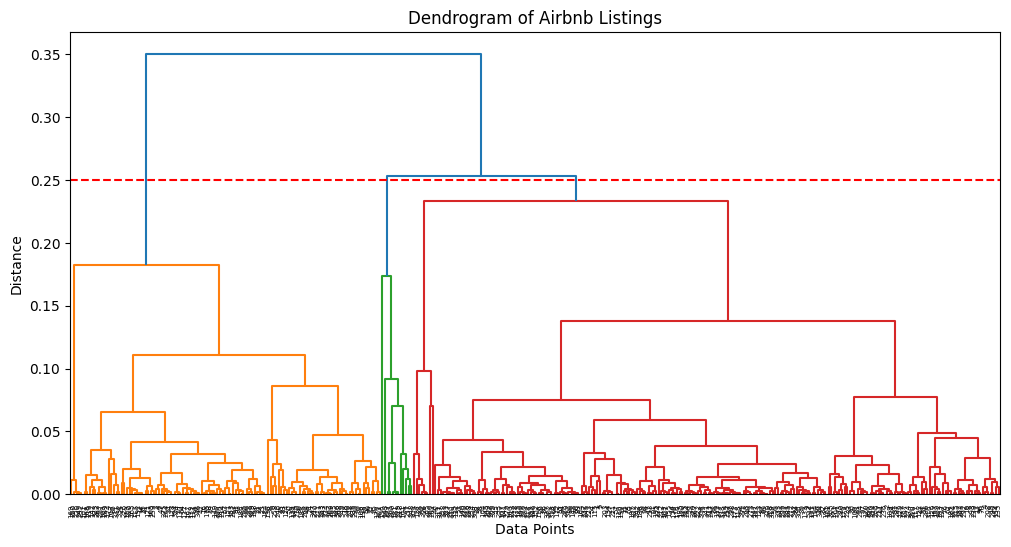

In [11]:
# Загрузка данных (замените на ваш путь к файлу)
# Используем только признаки широты и долготы
coords = df[['latitude', 'longitude']].dropna()

# Выполняем агломеративную кластеризацию
model = AgglomerativeClustering(n_clusters=6, linkage='complete')
df['cluster'] = model.fit_predict(coords)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Agglomerative Clustering of Airbnb Listings")
plt.colorbar(label="Cluster")
plt.show()

# Построение дендрограммы
linked = linkage(coords, method='complete')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top')
plt.axhline(y=0.25, color='r', linestyle='--')  # Добавление секущей линии
plt.title("Dendrogram of Airbnb Listings")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


### Задание 8.5

Для датасета *Airbnb* проведите *DBSCAN*-кластеризацию. В качестве признаков для кластеризации используйте *latitude* и *longitude*. Параметры для алгоритма кластеризации: *eps=0.012, min_samples=6.*

Визуализируйте результаты. Сколько кластеров получилось на графике?

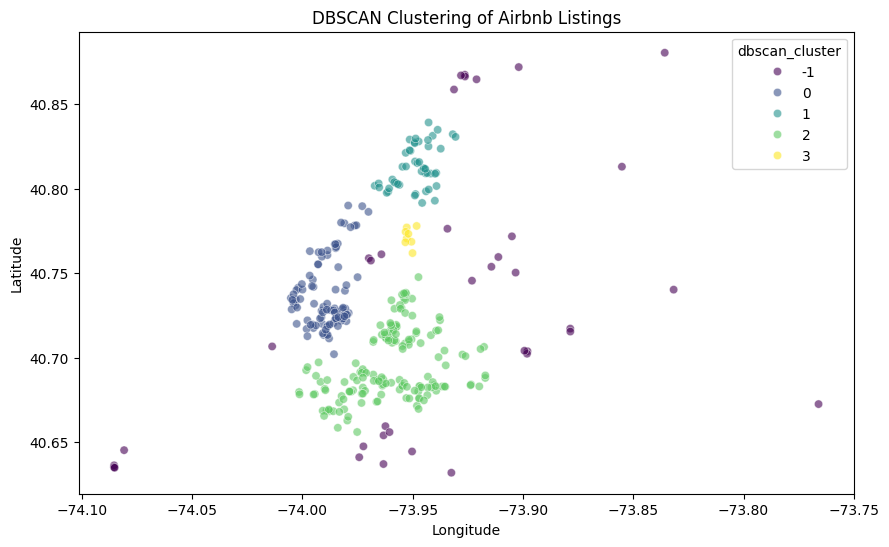

In [33]:

# Запускаем кластеризацию на данных Airbnb
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])

# Добавляем метки кластеров в DataFrame
df['dbscan_cluster'] = clustering.labels_

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df.longitude, 
    y=df.latitude, 
    hue=df.dbscan_cluster, 
    palette='viridis', 
    legend='full', 
    alpha=0.6
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of Airbnb Listings")
plt.show()

In [34]:

# Получаем уникальные метки кластеров
unique_clusters = np.unique(clustering.labels_)

# Количество кластеров (исключая шумовые точки с меткой -1)
n_clusters = len(unique_clusters[unique_clusters != -1])

print(f"Количество кластеров: {n_clusters}")

Количество кластеров: 4
